In [ ]:
!pip install opencv-python matplotlib pandas

# Imports

In [2]:
import tensorflow as tf
import os
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))

Num of GPUs available:  13


In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Loading Data

In [20]:
import cv2
import imghdr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
dataset_path = './Datasets/UTKFace/'

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [15]:
for image in os.listdir(dataset_path):
    image_path = os.path.join(dataset_path, image)
    try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)
    except Exception as e:
        print('Issue with image {}'.format(image_path))

In [21]:
images = []
ages = []

for filename in os.listdir(dataset_path):
    image_path = os.path.join(dataset_path, filename)
    split = filename.split('_')
    ages.append(int(split[0]))
    images.append(image_path)

In [23]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')

df = pd.concat([images, ages], axis=1)
df

,Images,Ages
0,./Datasets/UTKFace/100_0_0_20170112213500903.j...,100
1,./Datasets/UTKFace/100_0_0_20170112215240346.j...,100
2,./Datasets/UTKFace/100_1_0_20170110183726390.j...,100
3,./Datasets/UTKFace/100_1_0_20170112213001988.j...,100
4,./Datasets/UTKFace/100_1_0_20170112213303693.j...,100
...,...,...
23703,./Datasets/UTKFace/9_1_3_20161220222856346.jpg...,9
23704,./Datasets/UTKFace/9_1_3_20170104222949455.jpg...,9
23705,./Datasets/UTKFace/9_1_4_20170103200637399.jpg...,9
23706,./Datasets/UTKFace/9_1_4_20170103200814791.jpg...,9


100


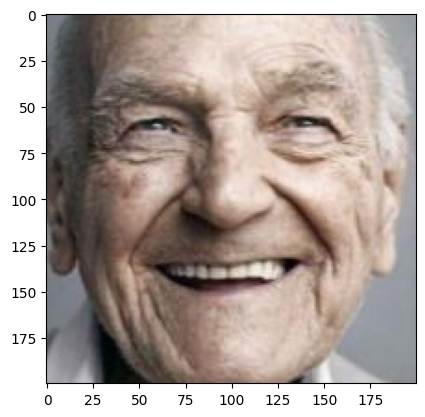

In [27]:
i = 1
plt.imshow(cv2.cvtColor(cv2.imread(df['Images'][i]), cv2.COLOR_BGR2RGB))
print(df['Ages'][i])

# Prepare Data

# Split the Data

# Create CNN

# Train the Model

# Evaluate the Model